<a href="https://colab.research.google.com/github/K18UHFT65RK9GitLo/ATCabbDiss/blob/main/Taranov_Anatoly/Data_preparation/PreparatVideo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вырез и обработка целевого фрагмента видео

# Работа с гугл диском
* по необходимости

In [ ]:
gauth = GoogleAuth()                #аутентификации пользователя в Google Drive.
drive = GoogleDrive(gauth)          #создания экземпляра объекта GoogleDrive

In [ ]:
file1 = drive.CreateFile({'title': 'Hello.txt'})      # создаст новый файл с названием "Hello.txt"
file1.SetContentString('Hello World!')                # создаст новый файл содержимым "Hello World!" на Google Drive
file1.Upload()

In [ ]:

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
drive_path = "/content/drive/MyDrive/Стажировка/KvantTelecom/HumanFall"  # Путь к папке на Google Drive
folder_name = 'IMG_data'  # Имя папки для сохранения изображений

# Создаем папку "Cabb_IMG" на Google Drive, если она не существует
folder_path = os.path.join(drive_path, folder_name)
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
    print("Папка '{}' успешно создана на Google Drive.".format(folder_name))
else:
    print("Папка '{}' уже существует на Google Drive.".format(folder_name))


Папка 'FallingIce_IMG' уже существует на Google Drive.


# Подготовка видео origcam1
 * Просматривая видео фиксируем начало и конец фрагмента с интересующими кадрами
 * Вырезаем нужные фрагменты видео с проверяем результат по изображениям
 * Код вырезает сравнивает на схожесть кадров, сохраняет в PNG .

In [ ]:
import cv2
import numpy as np
import os

# Открываем видеофайл
video_path = '/content/drive/MyDrive/Стажировка/KvantTelecom/HumanFall/VID_20240121_162437.mp4'
cap = cv2.VideoCapture(video_path)

# Параметры временных промежутков для вырезания
start_time_1 = 15  # начальное время первого фрагмента (в секундах)
end_time_1 = 43    # конечное время первого фрагмента (в секундах)
start_time_2 = 38  # начальное время второго фрагмента (в секундах)
end_time_2 = 64    # конечное время второго фрагмента (в секундах)

# Создаем директорию для сохранения кадров
output_directory = 'IMG_data'
os.makedirs(output_directory, exist_ok=True)

# Создаем список для хранения уникальных кадров
unique_frames = []

# Функция для вычисления хэша изображения
def dhash(image, hash_size=8):
    resized = cv2.resize(image, (hash_size + 1, hash_size))
    diff = resized[:, 1:] > resized[:, :-1]
    return sum([2 ** i for (i, v) in enumerate(diff.flatten()) if v])

# Функция для проверки схожести двух изображений
def is_similar(image1, image2, threshold=80):
    hash1 = dhash(image1)
    hash2 = dhash(image2)
    difference = bin(hash1 ^ hash2).count('1')
    similarity = (1 - difference / (8 * 8)) * 100
    return similarity >= threshold

# Обрабатываем видеофайл
frame_number = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_number += 1

    # Проверяем, находится ли текущий кадр в указанных временных промежутках
    if (frame_number >= start_time_1 * cap.get(cv2.CAP_PROP_FPS) and
        frame_number <= end_time_1 * cap.get(cv2.CAP_PROP_FPS)) or (frame_number >= start_time_2 * cap.get(cv2.CAP_PROP_FPS) and
        frame_number <= end_time_2 * cap.get(cv2.CAP_PROP_FPS)):

        # Пропускаем кадры, чтобы взять только один кадр из секунды
        if frame_number % int(cap.get(cv2.CAP_PROP_FPS)) != 0:
            continue

        # Проверяем, не является ли текущий кадр дубликатом
        is_duplicate = False
        for unique_frame in unique_frames:
            if is_similar(frame, unique_frame):
                is_duplicate = True
                break

        # Если кадр не дубликат, добавляем его в список уникальных кадров и сохраняем в PNG
        if not is_duplicate:
            unique_frames.append(frame)
            output_filename = os.path.join(output_directory, f"frame_{frame_number}.png")
            cv2.imwrite(output_filename, frame)

# Закрываем видеофайл
cap.release()


Работа с файлами на Google Drive

In [ ]:
import shutil

# Путь к папке 'img_data_1' в вашей Colab-сессии
source_folder_path = "/content/IMG_data"

# Путь к папке "Falling_IMG" на Google Drive
drive_path = "/content/drive/MyDrive/Стажировка/HumanFall/KvantTelecom/Falling_IMG"

# Копируем папку 'img_dat_1' в "Cabb_IMG" на Google Drive
shutil.copytree(source_folder_path, os.path.join(drive_path, 'Falling_IMG'))

print("Папка 'IMG_data' успешно скопирована в 'Falling_IMG' на Google Drive.")


Папка 'FallingIce_IMG' успешно скопирована в 'Cabb_IMG' на Google Drive.


Проверим выбранные изображения.

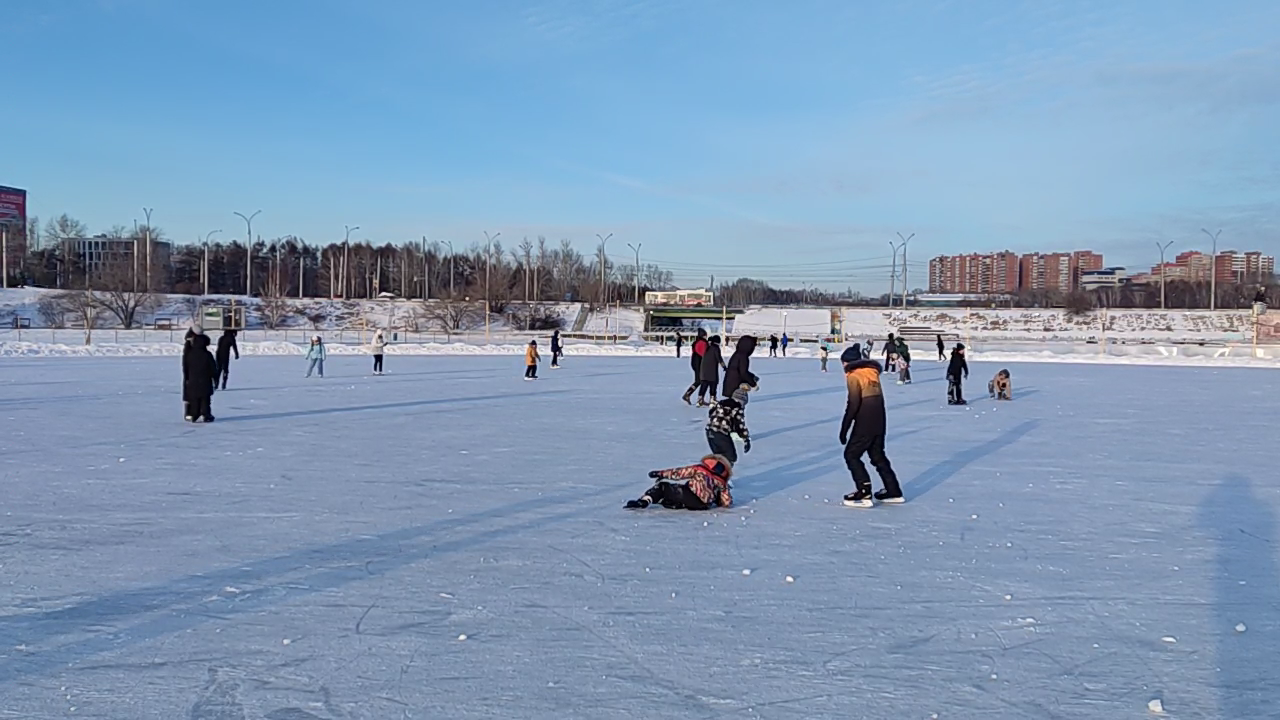

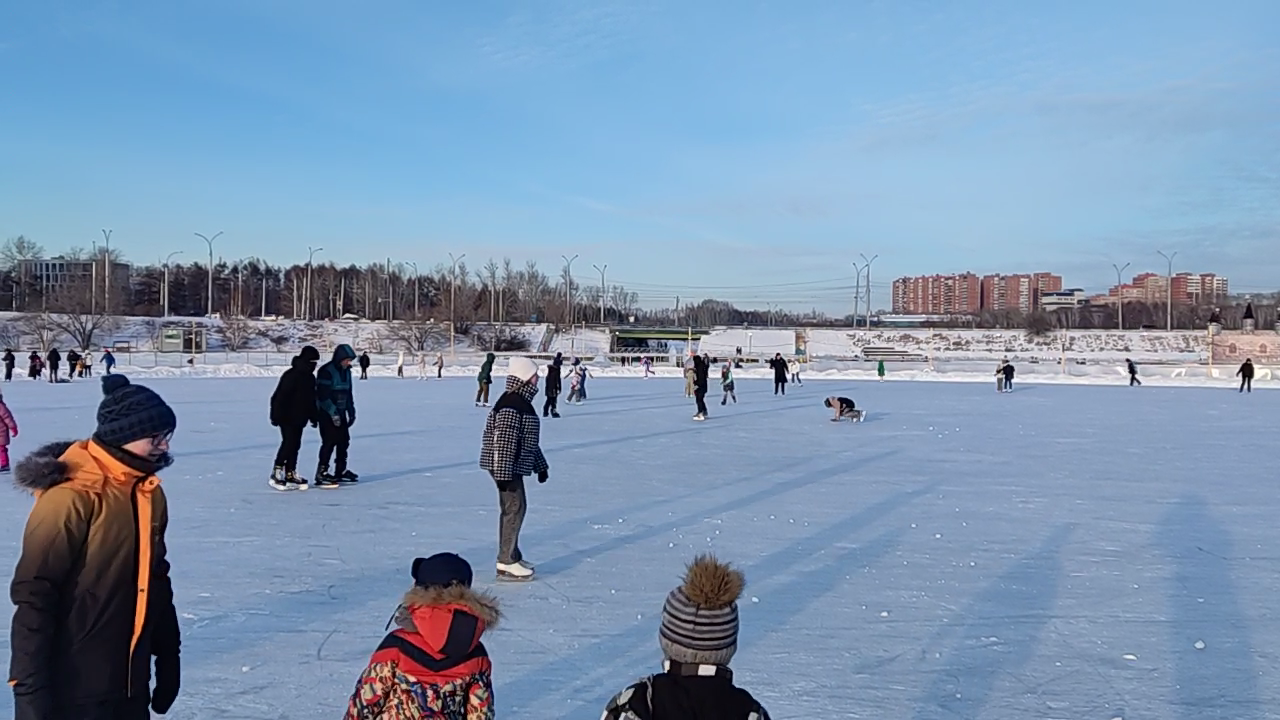

In [ ]:
from IPython.display import Image, display
import os

# Путь к папке с сохраненными изображениями
output_directory = 'IMG_data'

# Список изображений в папке
image_files = os.listdir(output_directory)

# Номера изображений, которые вы хотите просмотреть (измените этот список по вашему усмотрению)
image_numbers_to_display = [1, 18]

# Просмотр выбранных изображений
for image_number in image_numbers_to_display:
    if image_number < 1 or image_number > len(image_files):
        print(f"Изображение с номером {image_number} не существует.")
    else:
        image_file = image_files[image_number - 1]
        image_path = os.path.join(output_directory, image_file)
        display(Image(filename=image_path))


Сохраняем выводим информацию о формате и колличестве.

In [ ]:
import os

# Путь к папке с изображениями
folder_path = "/content/drive/MyDrive/Стажировка/KvantTelecom/FallingIce_IMG/IMG_data"

# Создаем словарь для хранения информации о форматах и их количестве
image_formats = {}

# Обходим все файлы в указанной папке
for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        # Получаем расширение файла (формат изображения)
        file_extension = filename.split('.')[-1].lower()

        # Обновляем словарь или добавляем новую запись
        if file_extension in image_formats:
            image_formats[file_extension] += 1
        else:
            image_formats[file_extension] = 1

# Выводим информацию о форматах и количестве
for format, count in image_formats.items():
    print(f"Формат: {format}, Количество: {count}")


Изображения обработанного origcam1 сохранены в в 'Cabb_IMG' на Google Drive
Папка 'img_dat_1'. Формат: png, Количество: 127